In [26]:
import os
import cv2
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import shutil

In [ ]:
plt.figure(figsize=(15,15))

carpeta = 'raw_data/test_images/train_imgs/pistol'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

FileNotFoundError: [Errno 2] No such file or directory: 'raw_data/test_images/train_imgs/pistol'

<Figure size 1500x1500 with 0 Axes>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
#
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=30,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=15,
    zoom_range=[0.5, 1.5],
    validation_split=0.2 
)


In [ ]:
print(len(os.listdir('raw_data/test_images/test_imgs/knife')))
print(len(os.listdir('raw_data/test_images/test_imgs/other')))
print(len(os.listdir('raw_data/test_images/test_imgs/pistol')))

225
132
78


In [ ]:
print(len(os.listdir('raw_data/test_images/train_imgs/knife')))
print(len(os.listdir('raw_data/test_images/train_imgs/other')))
print(len(os.listdir('raw_data/test_images/train_imgs/pistol')))

781
1755
795


In [ ]:
#train_dir = 'raw_data/test_images/train_imgs'
#test_dir = 'raw_data/test_images/test_imgs'

In [ ]:
carpeta_fuente = 'raw_data/test_images/train_imgs/knife'
carpeta_destino = 'dataset/knife'
imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 781:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
carpeta_fuente = 'raw_data/test_images/train_imgs/pistol'
carpeta_destino = 'dataset/pistol'
imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 781:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
carpeta_fuente = 'raw_data/test_images/train_imgs/other'
carpeta_destino = 'dataset/other'
imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 781:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
print(len(os.listdir('dataset/knife')))
print(len(os.listdir('dataset/other')))
print(len(os.listdir('dataset/pistol')))

781
781
781


In [ ]:
data_gen_train = datagen.flow_from_directory(
    'dataset/',
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    subset='training'
)

Found 1874 images belonging to 3 classes.


In [ ]:
data_gen_test = datagen.flow_from_directory(
    'dataset/',
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    subset='validation'
)

Found 468 images belonging to 3 classes.


In [ ]:
1874 * 0.25

468.5

In [ ]:
PATH ="raw_data/"
FILE="test_video.mp4"
VIDEO = PATH+FILE

In [ ]:
#cap = cv2.VideoCapture(VIDEO)

# 1.test

In [ ]:

#def process_video_test(video_path):
#    video = cv2.VideoCapture(video_path)
#
#    while video.isOpened():
#        ret, frame = video.read()
#
#        if not ret:
#            break
#
#        cv2.imshow('Video', frame)
#
#        if cv2.waitKey(1) == 27:
#            break
#        cv2.waitKey(25)
#    video.release()
#    cv2.destroyAllWindows()
#
#process_video_test(VIDEO)
#abre el video, funciona bien

In [ ]:
def preprocess_frame(frame):
    # Preprocess the frame (resize, normalize, etc.)
    resized_frame = cv2.resize(frame, (224, 224))
    normalized_frame = resized_frame / 255.0  # Normalize pixel values between 0 and 1
    preprocessed_frame = tf.expand_dims(normalized_frame, axis=0)  # Add batch dimension
    return preprocessed_frame

In [ ]:
def process_video(video_path, model):
    video = cv2.VideoCapture(video_path)
    detections = []

    while video.isOpened():
        ret, frame = video.read()

        if not ret:
            break

        processed_frame = preprocess_frame(frame)

        features = model(processed_frame)

        probabilities = tf.nn.softmax(features)

        class_id = tf.argmax(probabilities, axis=1)
        class_label = class_id.numpy()[0]

        cv2.imshow('Video', frame)

        if class_label == 1:
            detections.append("Pistol or handggun detected!")

        if cv2.waitKey(1) == 27:
            break

        cv2.waitKey(25)

    video.release()
    cv2.destroyAllWindows()

    # Print the detections
    if len(detections) > 0:
        print("Detections:")
        for detection in detections:
            print(detection)
    else:
        print("No pistol or handgun detected.")

# Model

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
#este es el de fabi
url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))
mobilenetv2.trainable = False

In [ ]:
process_video(VIDEO, model)

No pistol or handgun detected.


In [ ]:
model = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(3, activation='softmax')
])

#base_model = tf.keras.applications.MobileNetV2(
#                                               include_top=True,
#                                               weights='imagenet')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


## Acá hay que seguir y ver la precision, comparar con un baseline

In [ ]:
#https://github.com/EhabR98/Transfer-Learning-with-MobileNetV2

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Entrenar el modelo
EPOCHS = 50

historial = model.fit(
    data_gen_train, epochs=EPOCHS, batch_size=32,
    validation_data=data_gen_test
)


#model.fit(data_gen_train,
#          epochs=EPOCHS,
#          batch_size=32,
#          validation_data=data_gen_test)

2023-06-24 11:26:01.994251: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Epoch 1/50


2023-06-24 11:26:07.332492: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/zeros_like/StatefulPartitionedCall' with dtype float and shape [?,1,1,1280]
	 [[{{node gradients/zeros_like/StatefulPartitionedCall}}]]
2023-06-24 11:26:07.332659: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall' with dtype float and shape [?,7,7,1280]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall}}]]
2023-06-24 11:26:07.332735: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not

15/15 [==============================] - ETA: 0s - loss: 0.9120 - accuracy: 0.5598

2023-06-24 11:26:57.549604: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


15/15 [==============================] - 185s 12s/step - loss: 0.9120 - accuracy: 0.5598 - val_loss: 0.7675 - val_accuracy: 0.6665
Epoch 2/50
15/15 [==============================] - 146s 10s/step - loss: 0.2527 - accuracy: 0.9274 - val_loss: 0.4551 - val_accuracy: 0.8314
Epoch 3/50
15/15 [==============================] - 113s 8s/step - loss: 0.1566 - accuracy: 0.9509 - val_loss: 0.4091 - val_accuracy: 0.8367
Epoch 4/50
15/15 [==============================] - 160s 11s/step - loss: 0.1105 - accuracy: 0.9722 - val_loss: 0.3690 - val_accuracy: 0.8458
Epoch 5/50
15/15 [==============================] - 90s 6s/step - loss: 0.0913 - accuracy: 0.9744 - val_loss: 0.3885 - val_accuracy: 0.8388
Epoch 6/50
15/15 [==============================] - 121s 9s/step - loss: 0.0792 - accuracy: 0.9786 - val_loss: 0.3744 - val_accuracy: 0.8447
Epoch 7/50
15/15 [==============================] - 131s 9s/step - loss: 0.0688 - accuracy: 0.9829 - val_loss: 0.3379 - val_accuracy: 0.8666
Epoch 8/50
15/15 [====

In [ ]:
model.save('model_versions')

INFO:tensorflow:Assets written to: model_versions/assets


INFO:tensorflow:Assets written to: model_versions/assets


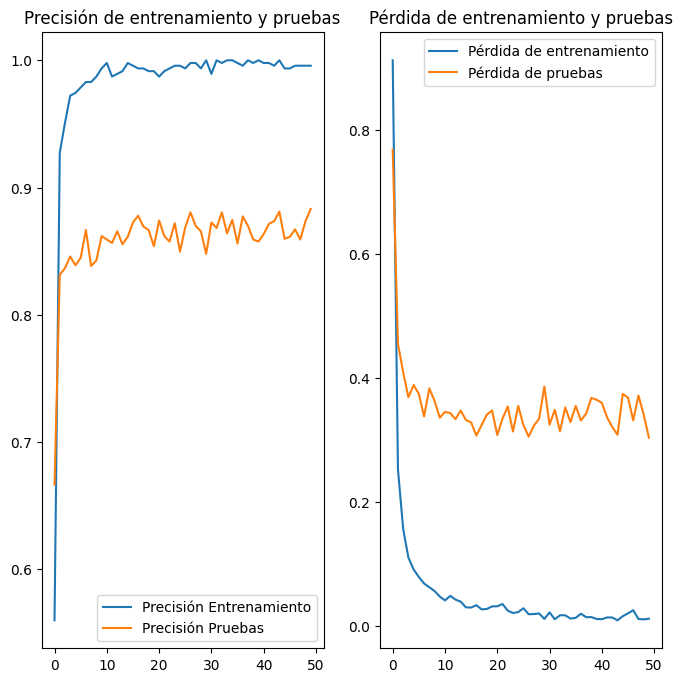

In [ ]:
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [ ]:
#overfitting.

In [ ]:
#process_video(VIDEO, model)